**Mazvita Lind-Rose Anne-Mary Tsikada R182578E
Andrew Sisipenzi R157699M**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

import regex as re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, SGDRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import pickle

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
food_info = pd.read_csv("/content/drive/MyDrive/datasets/branded_food.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
food_names = pd.read_csv("/content/drive/MyDrive/datasets/food.csv")

In [ ]:
nutrient_info = pd.read_csv("/content/drive/MyDrive/datasets/food_nutrient.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
nutrient_names = pd.read_csv("/content/drive/MyDrive/datasets/nutrient.csv")

In [ ]:
food_info.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,modified_date,available_date
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,LI,2017-11-15,2017-11-15
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26


In [ ]:
food_info.isnull().sum()

fdc_id                            0
brand_owner                     823
gtin_upc                          0
ingredients                    2534
serving_size                      0
serving_size_unit                 0
household_serving_fulltext     1402
branded_food_category         10118
data_source                       0
modified_date                     0
available_date                    0
dtype: int64

In [ ]:
food_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260370 entries, 0 to 260369
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fdc_id                      260370 non-null  int64  
 1   brand_owner                 259547 non-null  object 
 2   gtin_upc                    260370 non-null  object 
 3   ingredients                 257836 non-null  object 
 4   serving_size                260370 non-null  float64
 5   serving_size_unit           260370 non-null  object 
 6   household_serving_fulltext  258968 non-null  object 
 7   branded_food_category       250252 non-null  object 
 8   data_source                 260370 non-null  object 
 9   modified_date               260370 non-null  object 
 10  available_date              260370 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 21.9+ MB


In [ ]:
food_info["serving_size"].describe()

count    260370.000000
mean         80.601484
std          89.586163
min           0.015000
25%          28.000000
50%          42.000000
75%         112.000000
max        3750.000000
Name: serving_size, dtype: float64

In [ ]:
food_info["brand_owner"].nunique()

24144

In [ ]:
food_names.head()

,fdc_id,data_type,description,food_category_id,publication_date
0,356425,branded_food,MOCHI ICE CREAM BONBONS,NaN,2019-04-01
1,356426,branded_food,CHIPOTLE BARBECUE SAUCE,NaN,2019-04-01
2,356427,branded_food,HOT & SPICY BARBECUE SAUCE,NaN,2019-04-01
3,356428,branded_food,BARBECUE SAUCE,NaN,2019-04-01
4,356429,branded_food,BARBECUE SAUCE,NaN,2019-04-01


In [ ]:
food_names.isnull().sum()

fdc_id                   0
data_type                0
description              0
food_category_id    260370
publication_date         0
dtype: int64

In [ ]:
# dropping null col
food_names.drop(columns=["food_category_id"], inplace=True)

In [ ]:
# checking data types of food_names
food_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260370 entries, 0 to 260369
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   fdc_id            260370 non-null  int64 
 1   data_type         260370 non-null  object
 2   description       260370 non-null  object
 3   publication_date  260370 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.9+ MB


In [ ]:
food_names["description"].nunique()

161177

In [ ]:
nutrient_info.head()

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,13338591,323505,2048,35.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN
1,13338389,326196,2048,36.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN
2,13338390,747447,2048,32.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN
3,13338391,321611,2048,20.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN
4,13338392,746769,2048,17.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
nutrient_info.isnull().sum()

id                          0
fdc_id                      0
nutrient_id                 0
amount                      0
data_points          14577366
derivation_id          642147
min                  15218166
max                  15218164
median               15314455
footnote             15324645
min_year_acquired    15300052
dtype: int64

In [ ]:
nutrient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15324912 entries, 0 to 15324911
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   fdc_id             int64  
 2   nutrient_id        int64  
 3   amount             float64
 4   data_points        float64
 5   derivation_id      float64
 6   min                float64
 7   max                float64
 8   median             float64
 9   footnote           object 
 10  min_year_acquired  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.3+ GB


In [ ]:
nutrient_info["amount"].describe()

count    1.532491e+07
mean     9.046870e+02
std      1.931348e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.600000e+00
75%      3.870000e+01
max      7.500000e+09
Name: amount, dtype: float64

In [ ]:
nutrient_names.head()

,id,name,unit_name,nutrient_nbr,rank
0,1002,Nitrogen,G,202.0,500.0
1,1003,Protein,G,203.0,600.0
2,1004,Total lipid (fat),G,204.0,800.0
3,1005,"Carbohydrate, by difference",G,205.0,1110.0
4,1007,Ash,G,207.0,1000.0


In [ ]:
nutrient_names.isnull().sum()

id              0
name            0
unit_name       0
nutrient_nbr    0
rank            1
dtype: int64

In [ ]:
nutrient_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            227 non-null    int64  
 1   name          227 non-null    object 
 2   unit_name     227 non-null    object 
 3   nutrient_nbr  227 non-null    float64
 4   rank          226 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.0+ KB


In [ ]:
nutrient_names.describe()

,id,nutrient_nbr,rank
count,227.000000,227.000000,226.000000
mean,1286.568282,497.475771,71425.601770
std,280.881417,191.178465,239201.102382
min,1002.000000,202.000000,100.000000
25%,1111.500000,322.500000,7232.500000
50%,1216.000000,503.000000,10650.000000
75%,1305.500000,645.500000,15190.000000
max,2032.000000,861.000000,999999.000000


In [ ]:
nutrient_names[nutrient_names["rank"].isnull()]

,id,name,unit_name,nutrient_nbr,rank
23,1072,"Carbohydrate, other",G,284.0,NaN


In [ ]:
null_cols = ["data_points", "min", "max", "median", "footnote", "min_year_acquired"]

nutrient_info.drop(columns=null_cols, inplace=True)

nutrient_info.head()

,id,fdc_id,nutrient_id,amount,derivation_id
0,13338591,323505,2048,35.0,49.0
1,13338389,326196,2048,36.0,49.0
2,13338390,747447,2048,32.0,49.0
3,13338391,321611,2048,20.0,49.0
4,13338392,746769,2048,17.0,49.0


In [ ]:
nutrient_names[nutrient_names["name"].duplicated()]

,id,name,unit_name,nutrient_nbr,rank
21,1062,Energy,kJ,268.0,400.0


In [ ]:
nutrient_info[nutrient_info["nutrient_id"] == 1062]["amount"]

205        1286.0
219        1381.0
235        1577.0
246         972.0
295        1144.0
            ...  
7547079     258.0
7547270     252.0
7547461     247.0
7547652     256.0
7547843     271.0
Name: amount, Length: 7937, dtype: float64

In [ ]:
nutrient_info.loc[nutrient_info["nutrient_id"] == 1062, "amount"] = nutrient_info[
    nutrient_info["nutrient_id"] == 1062]["amount"].map(lambda x: round(x / 4.1868, 2))

In [ ]:
nutrient_info[nutrient_info["nutrient_id"] == 1062]

,id,fdc_id,nutrient_id,amount,derivation_id
205,1283676,167512,1062,307.16,49.0
219,1283690,167513,1062,329.85,47.0
235,1283706,167514,1062,376.66,NaN
246,1283717,167515,1062,232.16,49.0
295,1283766,167516,1062,273.24,49.0
...,...,...,...,...,...
7547079,13337624,1105430,1062,61.62,49.0
7547270,13337815,1105547,1062,60.19,49.0
7547461,13338006,1105664,1062,58.99,49.0
7547652,13338197,1105781,1062,61.14,49.0


In [ ]:
nutrient_names[nutrient_names["name"] == "Energy"]

,id,name,unit_name,nutrient_nbr,rank
5,1008,Energy,KCAL,208.0,300.0
21,1062,Energy,kJ,268.0,400.0


In [ ]:
nutrient_info[nutrient_info["nutrient_id"] == 1062].count()

id               7937
fdc_id           7937
nutrient_id      7937
amount           7937
derivation_id    5369
dtype: int64

In [ ]:
nutrient_info["nutrient_id"].replace(to_replace=1062, value=1008, inplace=True)

In [ ]:
nutrient_info[nutrient_info["nutrient_id"] == 1062].count()

id               0
fdc_id           0
nutrient_id      0
amount           0
derivation_id    0
dtype: int64

In [ ]:
nutrient_info[nutrient_info["nutrient_id"] == 1008]["derivation_id"].value_counts()

70.0    449401
49.0     11297
71.0     11186
78.0      2437
47.0       751
73.0       284
44.0       272
56.0       263
72.0       162
65.0       128
62.0        64
57.0        56
20.0        45
63.0        36
51.0        34
1.0         33
40.0        30
46.0        28
58.0        26
67.0        14
39.0        12
41.0         6
16.0         2
52.0         2
43.0         2
74.0         2
53.0         2
18.0         2
55.0         2
60.0         2
77.0         1
Name: derivation_id, dtype: int64

In [ ]:
nutrient_names.rename(axis=1, mapper={"id": "nutrient_id"}, inplace=True)

In [ ]:
nutrients = nutrient_info.merge(nutrient_names, on="nutrient_id")
nutrients.head()

,id,fdc_id,nutrient_id,amount,derivation_id,name,unit_name,nutrient_nbr,rank
0,1283674,167512,1003,5.88,46.0,Protein,G,203.0,600.0
1,1283688,167513,1003,4.34,47.0,Protein,G,203.0,600.0
2,1283712,167514,1003,6.10,1.0,Protein,G,203.0,600.0
3,1283725,167515,1003,8.00,47.0,Protein,G,203.0,600.0
4,1283760,167516,1003,6.58,1.0,Protein,G,203.0,600.0


In [ ]:
nutrients["fdc_id"].nunique()

518335

In [ ]:
nutrients_pivot = nutrients.pivot_table(index = 'fdc_id', columns = 'name', values = 'amount')
nutrients_pivot.head()

name,10-Formyl folic acid (10HCOFA),10:0,11:0,12:0,12:1,13:0,14:0,14:1,14:1 c,14:1 t,15:0,15:1,16:0,16:1,16:1 c,16:1 t,17:0,17:1,17:1 c,18:0,18:1,18:1 c,18:1 t,18:1-11 t (18:1t n-7),18:2,18:2 CLAs,18:2 c,18:2 i,"18:2 n-6 c,c",18:2 t not further defined,"18:2 t,t",18:3,18:3 c,"18:3 n-3 c,c,c (ALA)","18:3 n-6 c,c,c",18:3 t,18:3i,18:4,20:0,20:1,20:1 c,20:1 t,20:2 c,"20:2 n-6 c,c",20:3,20:3 c,20:3 n-3,20:3 n-6,20:3 n-9,20:4,...,Sorbitol,Specific Gravity,Starch,Stigmasterol,Sucrose,"Sugars, Total NLEA","Sugars, added","Sugars, total including NLEA","Sulfur, S",Taurine,Theobromine,Thiamin,Threonine,"Tocopherol, beta","Tocopherol, delta","Tocopherol, gamma","Tocotrienol, alpha","Tocotrienol, beta","Tocotrienol, delta","Tocotrienol, gamma",Total fat (NLEA),Total lipid (fat),Total sugar alcohols,Tryptophan,Tyrosine,Valine,"Vitamin A, IU","Vitamin A, RAE",Vitamin B-12,"Vitamin B-12, added",Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E,Vitamin E (alpha-tocopherol),Vitamin E (label entry primarily),"Vitamin E, added",Vitamin K (phylloquinone),Water,Xylitol,Zeaxanthin,"Zinc, Zn",cis-Lutein/Zeaxanthin,cis-Lycopene,cis-beta-Carotene,trans-Lycopene,trans-beta-Carotene
fdc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.27,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303,NaN,NaN,NaN,0.841,NaN,NaN,NaN,NaN,NaN,NaN,0.079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167516,NaN,0.0,NaN,0.0,NaN,NaN,0.021,0.0,NaN,NaN,0.0,0.0,1.025,0.022,NaN,NaN,0.01,0.0,NaN,0.772,4.469,NaN,NaN,NaN,1.414,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.002,0.031,0.039,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.009,...,NaN,NaN,35.51,NaN,2.67,NaN,NaN,4.30,NaN,NaN,0.0,0.499,0.225,0.07,1.27,4.03,0.03,0.0,0.0,0.0,NaN,9.22,NaN,0.074,0.154,0.326,1340.0,401.0,2.86,2.7,0.972,0.0,NaN,NaN,NaN,NaN,NaN,0.62,NaN,0.0,10.5,40.34,NaN,NaN,0.48,NaN,NaN,NaN,NaN,NaN


In [ ]:
nutrients_pivot.isnull().mean().sort_values()

name
Protein                        0.040128
Carbohydrate, by difference    0.055738
Sodium, Na                     0.063035
Total lipid (fat)              0.076437
Energy                         0.076894
                                 ...   
Specific Gravity               0.999988
Glutamine                      0.999996
Acetic acid                    0.999998
Ribose                         0.999998
Lactic acid                    0.999998
Length: 226, dtype: float64

In [ ]:
nutrients_pivot.isnull().mean().sort_values().head(12).index

Index(['Protein', 'Carbohydrate, by difference', 'Sodium, Na',
       'Total lipid (fat)', 'Energy', 'Sugars, total including NLEA',
       'Fatty acids, total saturated', 'Fatty acids, total trans',
       'Fiber, total dietary', 'Cholesterol', 'Calcium, Ca', 'Iron, Fe'],
      dtype='object', name='name')

In [ ]:
nutr_cols = ['Total lipid (fat)', 'Protein', 'Carbohydrate, by difference',
       'Sodium, Na', 'Energy', 'Sugars, total including NLEA',
       'Fatty acids, total saturated', 'Cholesterol', 'Fiber, total dietary',
            'Fatty acids, total trans']

In [ ]:
nutrients_pivot = nutrients_pivot[nutr_cols]

nutrients_pivot.head()

name,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Fatty acids, total trans"
fdc_id,,,,,,,,,,
167512,13.24,5.88,41.18,1059.0,307.080,5.88,2.941,0.0,1.2,4.412
167513,11.27,4.34,53.42,780.0,329.925,21.34,3.250,0.0,1.4,4.290
167514,3.70,6.10,79.80,2182.0,376.830,NaN,NaN,NaN,NaN,NaN
167515,1.80,8.00,46.00,345.0,232.080,NaN,0.308,NaN,NaN,0.082
167516,9.22,6.58,41.05,621.0,273.120,4.30,1.898,15.0,2.2,NaN


In [ ]:
nutrients_pivot.describe()

name,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Fatty acids, total trans"
count,478715.000000,497535.000000,489444.000000,4.856620e+05,478478.000000,468864.000000,412912.000000,392486.000000,400675.000000,404842.000000
mean,12.585831,7.368259,34.298368,1.437080e+03,268.527902,16.571456,4.973913,64.197240,2.968073,0.036261
std,19.806100,10.733319,43.204898,7.268381e+04,267.567899,32.199360,9.101873,2091.490532,6.234649,1.470307
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.410000,7.040000,4.400000e+01,88.000000,1.580000,0.000000,0.000000,0.000000,0.000000
50%,5.830000,4.550000,23.530000,2.730000e+02,262.000000,6.250000,2.210000,0.000000,1.600000,0.000000
75%,19.570000,10.330000,60.000000,5.710000e+02,400.000000,24.240000,7.140000,28.000000,3.600000,0.000000
max,3200.000000,1040.000000,6400.000000,2.583333e+07,39600.000000,5800.000000,1780.000000,310714.000000,1730.000000,615.380000


In [ ]:
foods = food_info.merge(food_names, on="fdc_id")
foods.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,modified_date,available_date,data_type,description,publication_date
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,LI,2017-11-15,2017-11-15,branded_food,MOCHI ICE CREAM BONBONS,2019-04-01
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,CHIPOTLE BARBECUE SAUCE,2019-04-01
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,HOT & SPICY BARBECUE SAUCE,2019-04-01
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,BARBECUE SAUCE,2019-04-01
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,BARBECUE SAUCE,2019-04-01


In [ ]:
foods["data_type"].value_counts()

branded_food    260370
Name: data_type, dtype: int64

In [ ]:
drop_cols = ["gtin_upc", "data_source", "modified_date", "available_date", "data_type", "publication_date"]
foods.drop(columns=drop_cols, inplace=True)
foods.head()

,fdc_id,brand_owner,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description
0,356425,"G. T. Japan, Inc.","ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS
1,356426,FRESH & EASY,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE
2,356427,FRESH & EASY,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE
3,356428,FRESH & EASY,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE
4,356429,FRESH & EASY,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE


In [ ]:
foods = foods.merge(nutrients_pivot, left_on="fdc_id", right_on=nutrients_pivot.index)
foods.head()

,fdc_id,brand_owner,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Fatty acids, total trans"
0,356425,"G. T. Japan, Inc.","ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,6.25,2.5,35.00,75.0,200.0,30.00,3.75,25.0,0.0,0.0
1,356426,FRESH & EASY,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,0.00,0.0,43.24,703.0,162.0,37.84,0.00,0.0,0.0,0.0
2,356427,FRESH & EASY,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,0.00,0.0,41.18,676.0,176.0,35.29,0.00,0.0,0.0,0.0
3,356428,FRESH & EASY,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,34.29,971.0,143.0,28.57,0.00,0.0,0.0,0.0
4,356429,FRESH & EASY,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,45.95,757.0,189.0,43.24,0.00,0.0,0.0,0.0


In [ ]:
nutr_names_dict = {
    'Total lipid (fat)': "fat_total",
    'Protein': "protein",
    'Carbohydrate, by difference': "carbs",
    'Sodium, Na': "sodium",
    'Energy': "energy",
    'Sugars, total including NLEA': "sugars",
    'Fatty acids, total saturated': "fat_sat",
    'Cholesterol': "chol",
    'Fiber, total dietary': "fiber",
    'Fatty acids, total trans': "fat_trans"
}

foods.rename(columns=nutr_names_dict, inplace=True)

foods = foods[["fdc_id", "brand_owner",
               "branded_food_category",
               "description",
               "ingredients",
               "serving_size",
               "serving_size_unit",
               "household_serving_fulltext",
               "energy",
               "fat_total",
               "fat_sat",
               "fat_trans",
               "chol",
               "protein",
               "carbs",
               "fiber",
               "sugars",
               "sodium",
              ]]

foods.head()

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,serving_size_unit,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
0,356425,"G. T. Japan, Inc.",Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,200.0,6.25,3.75,0.0,25.0,2.5,35.00,0.0,30.00,75.0
1,356426,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,162.0,0.00,0.00,0.0,0.0,0.0,43.24,0.0,37.84,703.0
2,356427,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,176.0,0.00,0.00,0.0,0.0,0.0,41.18,0.0,35.29,676.0
3,356428,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,143.0,0.00,0.00,0.0,0.0,0.0,34.29,0.0,28.57,971.0
4,356429,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,189.0,0.00,0.00,0.0,0.0,0.0,45.95,0.0,43.24,757.0


In [ ]:
foods["serving_size_unit"].value_counts(normalize=True)

g     0.868622
ml    0.131378
Name: serving_size_unit, dtype: float64

In [ ]:
foods = foods[foods["serving_size_unit"] == "g"]

foods.drop(columns="serving_size_unit", inplace=True)

foods.head()

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
0,356425,"G. T. Japan, Inc.",Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,1 PIECE,200.0,6.25,3.75,0.0,25.0,2.5,35.00,0.0,30.00,75.0
1,356426,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,2 Tbsp,162.0,0.00,0.00,0.0,0.0,0.0,43.24,0.0,37.84,703.0
2,356427,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,2 Tbsp,176.0,0.00,0.00,0.0,0.0,0.0,41.18,0.0,35.29,676.0
3,356428,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,2 Tbsp,143.0,0.00,0.00,0.0,0.0,0.0,34.29,0.0,28.57,971.0
4,356429,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,2 Tbsp,189.0,0.00,0.00,0.0,0.0,0.0,45.95,0.0,43.24,757.0


In [ ]:
foods.isnull().sum()

fdc_id                            0
brand_owner                     810
branded_food_category          8638
description                       0
ingredients                    2014
serving_size                      0
household_serving_fulltext     1104
energy                        10082
fat_total                       245
fat_sat                       19419
fat_trans                     30365
chol                          22783
protein                         334
carbs                           897
fiber                         25472
sugars                        11732
sodium                         1614
dtype: int64

In [ ]:
foods[foods["ingredients"].isnull()].head()

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
818,357243,AS DE OROZ,Vegetable and Lentil Mixes,FRIJOL NEGRO SMALL BLACK BEANS,NaN,36.0,0.25 cup,125.0,0.00,0.00,NaN,0.0,22.22,63.89,44.4,2.78,69.0
1625,358046,"Rocky Mountain Natural Meats, Inc.",Other Meats,PREMIUM GROUND BISON,NaN,113.0,4 ONZ,168.0,9.73,3.54,NaN,53.0,20.35,0.00,0.0,0.00,53.0
1910,358331,"Wal-Mart Stores, Inc.",Butter & Spread,SHORTENING,NaN,11.0,1 Tbsp,909.0,100.00,40.91,4.55,91.0,0.00,0.00,0.0,0.00,0.0
2061,358481,Moonlight Packing Corporation,Pre-Packaged Fruit & Vegetables,"MOONLIGHT, PREMIUM CALIFORNIA FRUIT LEMONS",NaN,58.0,1 MEDIUM LEMON,26.0,0.00,0.00,NaN,0.0,0.00,8.62,3.4,3.45,0.0
2382,360610,WEIS,"Poultry, Chicken & Turkey","WEIS, CHICKEN WINGS",NaN,112.0,4 ONZ,223.0,16.07,4.46,0.00,76.0,18.75,0.00,0.0,0.00,71.0


In [ ]:
foods = foods.dropna(subset=["branded_food_category", "ingredients"])

In [ ]:
foods.isnull().sum()

fdc_id                            0
brand_owner                      18
branded_food_category             0
description                       0
ingredients                       0
serving_size                      0
household_serving_fulltext       87
energy                         1798
fat_total                       206
fat_sat                       18776
fat_trans                     28403
chol                          21108
protein                         283
carbs                           156
fiber                         24134
sugars                        11110
sodium                          871
dtype: int64

In [ ]:
foods["energy"].isnull().sum()

1798

In [ ]:
foods["null_energy"] = (foods["fat_total"] * 9) + (foods["carbs"] * 4) + (foods["protein"] * 4)

foods.head()

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium,null_energy
0,356425,"G. T. Japan, Inc.",Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,1 PIECE,200.0,6.25,3.75,0.0,25.0,2.5,35.00,0.0,30.00,75.0,206.25
1,356426,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,2 Tbsp,162.0,0.00,0.00,0.0,0.0,0.0,43.24,0.0,37.84,703.0,172.96
2,356427,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,2 Tbsp,176.0,0.00,0.00,0.0,0.0,0.0,41.18,0.0,35.29,676.0,164.72
3,356428,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,2 Tbsp,143.0,0.00,0.00,0.0,0.0,0.0,34.29,0.0,28.57,971.0,137.16
4,356429,FRESH & EASY,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,2 Tbsp,189.0,0.00,0.00,0.0,0.0,0.0,45.95,0.0,43.24,757.0,183.80


In [ ]:
foods.loc[foods["energy"].isnull(), "energy"] = foods.loc[foods["energy"].isnull(), "null_energy"]

In [ ]:
foods["energy"].isnull().sum()

14

In [ ]:
foods.drop(columns="null_energy", inplace=True)

In [ ]:
foods.loc[foods["fat_total"] == 0, "fat_sat"] = foods[foods["fat_total"] == 0]["fat_sat"].map(lambda x: 0)

In [ ]:
foods.loc[foods["fat_total"] == 0, "fat_trans"] = foods[foods["fat_total"] == 0]["fat_trans"].map(lambda x: 0)

In [ ]:
foods.loc[foods["carbs"] == 0, "fiber"] = foods[foods["carbs"] == 0]["fiber"].map(lambda x: 0)

In [ ]:
foods.loc[foods["carbs"] == 0, "sugars"] = foods[foods["carbs"] == 0]["sugars"].map(lambda x: 0)

In [ ]:
foods[(foods["fat_sat"].isnull()) & (foods["fat_trans"].isnull())].shape

(1558, 17)

In [ ]:
foods.shape

(215511, 17)

In [ ]:
foods.isnull().sum()

fdc_id                            0
brand_owner                      18
branded_food_category             0
description                       0
ingredients                       0
serving_size                      0
household_serving_fulltext       87
energy                           14
fat_total                       206
fat_sat                        1804
fat_trans                      9684
chol                          21108
protein                         283
carbs                           156
fiber                         16953
sugars                         4733
sodium                          871
dtype: int64

In [ ]:
foods.dropna(subset=["sugars", "fiber", "fat_sat", "fat_trans"], inplace=True)

In [ ]:
foods.loc[foods["chol"].isnull(), "chol"] = foods[foods["chol"].isnull()]["chol"].map(lambda x: 0)

In [ ]:
foods.isnull().sum()

fdc_id                          0
brand_owner                    14
branded_food_category           0
description                     0
ingredients                     0
serving_size                    0
household_serving_fulltext     76
energy                          2
fat_total                     115
fat_sat                         0
fat_trans                       0
chol                            0
protein                       123
carbs                          24
fiber                           0
sugars                          0
sodium                        450
dtype: int64

In [ ]:
foods[foods["energy"].isnull()]

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
45904,402252,RFM CORPORATION,"Cake, Cookie & Cupcake Mixes","WHITE KING, BIBINGKA RICE CAKE MIX","RICE FLOUR, BROMATE-FREE WHEAT FLOUR, DEXTROSE, SUGAR, LODIZED SALT, BAKING POWDER AS LEAVENING ...",30.0,30 GRM,NaN,0.0,0.0,0.0,0.0,NaN,83.33,3.3,30.0,1367.0
252828,598081,EMPERAFDOR,Cookies & Biscuits,SABOR VAINILLA,"WHEAT FLOUR, SUGAR, VEGETABLE FAT (CONTAINS TBHQ ANTIOXIDANTS, ASCORBYL PALMITATE, TOCOPHEROLS),...",30.0,3 COOKIES | APPROX.,NaN,NaN,10.0,0.0,17.0,6.67,66.67,3.3,30.0,320.0


In [ ]:
foods.dropna(inplace=True)

In [ ]:
foods.describe()

,fdc_id,serving_size,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
count,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000,189147.000000
mean,476888.887516,63.946456,294.683967,13.613851,4.803111,0.036883,34.704775,8.174795,35.720492,2.793492,15.377135,759.669717
std,74038.173441,58.926462,179.937729,16.142785,7.058852,0.520516,1010.012360,8.514758,28.331885,4.260724,19.934000,3148.396012
min,344609.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409865.500000,28.000000,130.000000,0.770000,0.000000,0.000000,0.000000,2.380000,8.820000,0.000000,1.180000,67.000000
50%,473704.000000,40.000000,308.000000,8.240000,1.790000,0.000000,0.000000,6.000000,29.250000,1.600000,5.000000,314.000000
75%,541584.000000,85.000000,423.000000,21.430000,7.140000,0.000000,22.000000,11.250000,60.710000,3.600000,24.710000,591.000000
max,604972.000000,2091.000000,7500.000000,100.000000,100.000000,53.570000,100000.000000,100.000000,100.000000,100.000000,100.000000,100000.000000


In [ ]:
foods[foods["serving_size"] >= 1000]

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
83936,437001,Disk Technologies Corporation,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VANILLA BEAN","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, VANIL...",2091.0,4 ONZ,11.0,0.67,0.57,0.00,0.0,0.14,1.63,0.1,1.05,3.0
84112,437177,Sculatti I.F.S.,Ice Cream & Frozen Yogurt,"SWEET ACTION ICE CREAM, ICE CREAM, VEGAN COFFEE, DOUGHNUTS","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, VEGAN...",2091.0,4 ONZ,11.0,0.67,0.57,0.00,0.0,0.14,1.82,0.1,1.10,11.0
84172,437237,Reese Orchards,Ice Cream & Frozen Yogurt,"SWEET ACTION, ICE CREAM, VEGAN CINNAMON ROLL","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, BROWN...",2091.0,4 ONZ,16.0,0.81,0.62,0.00,0.0,0.14,2.58,0.1,1.82,12.0
98879,451944,TEXAS RED,"Seasoning Mixes, Salts, Marinades & Tenderizers","TEXAS RED, MESQUITE BAR-B-QUE RUB","SUGAR, SALT, CHILI POWDER (CHILI POWDERS, ASPICES, SALT, GARLIC POWDER, SILICON DIOXIDE, ETHOXYQ...",1000.0,2 Tbsp,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,7.0
99636,452701,Disk Technologies Corporation,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VEGAN MINT CHIP","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVEPORATED CANE JUICE, CHOCO...",2091.0,4 ONZ,13.0,0.77,0.62,0.00,0.0,0.14,1.87,0.1,1.15,11.0
99765,452830,Sculatti I.F.S.,Ice Cream & Frozen Yogurt,"SWEET ACTION, ICE CREAM, VEGAN COOKIES + CREAM","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, CHOCO...",2091.0,4 ONZ,12.0,0.72,0.57,0.00,0.0,0.14,1.87,0.1,1.10,11.0
99766,452831,Sculatti I.F.S.,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VEGAN STRAWBERRY","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), STRAWBERRIES, EVAPORATED CAN...",2091.0,4 ONZ,11.0,0.57,0.48,0.00,0.0,0.14,1.82,0.1,1.24,9.0
99767,452832,Sculatti I.F.S.,Ice Cream & Frozen Yogurt,"SWEET ACTION ICE CREAM, ICE CREAM, VEGAN COCONUT FUDGE","ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, ALMON...",2091.0,4 ONZ,12.0,0.77,0.57,0.00,0.0,0.19,1.82,0.1,1.10,11.0
106558,459623,Citadel Enterprises Inc.,Canned Vegetables,DICED POTATOES,"POTATOES, WATER, SALT, CALCIUM CHLORIDE, DISODIUM EDTA",1262.0,0.5 cup,4.0,0.00,0.00,0.00,0.0,0.08,0.87,0.1,0.00,22.0
240456,585947,"Kitchens Of The Oceans, Inc.",Frozen Dinners & Entrees,"SHORELINE FEAST, MUSSELS, CLAMS, SHRIMP, SAUSAGE, AND VEGGIES IN A FLAVORFUL BROTH","COOKED MUSSELS, CORN ON THE COB, RED POTATOES, RAW SHRIMP, CLAMS, ITALIAN SAUSAGE (PORK, WATER, ...",1814.0,64 ONZ,37.0,1.60,0.72,0.03,10.0,2.37,3.47,0.4,0.55,72.0


In [ ]:
foods.loc[foods["serving_size"] > 2000,
          "serving_size"] = foods[foods["serving_size"] > 2000]["serving_size"].map(lambda x: 85)

In [ ]:
foods.loc[240456, "serving_size"] = foods.loc[240456, "serving_size"] / 5

In [ ]:
foods.drop([106558, 98879], inplace=True)

In [ ]:
foods.describe()

,fdc_id,serving_size,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
count,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000
mean,476889.110682,63.853262,294.687062,13.613995,4.803161,0.036883,34.705142,8.174881,35.720865,2.793521,15.377298,759.677597
std,74038.532017,57.379124,179.936163,16.142810,7.058872,0.520518,1010.017693,8.514762,28.331802,4.260737,19.934042,3148.411725
min,344609.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409865.000000,28.000000,130.000000,0.770000,0.000000,0.000000,0.000000,2.380000,8.820000,0.000000,1.180000,67.000000
50%,473705.000000,40.000000,308.000000,8.240000,1.790000,0.000000,0.000000,6.000000,29.250000,1.600000,5.000000,314.000000
75%,541585.000000,85.000000,423.000000,21.430000,7.140000,0.000000,22.000000,11.250000,60.710000,3.600000,24.710000,591.000000
max,604972.000000,907.185000,7500.000000,100.000000,100.000000,53.570000,100000.000000,100.000000,100.000000,100.000000,100.000000,100000.000000


In [ ]:
foods[foods["energy"] > 2000]

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
52027,408264,TAPATIO,"Seasoning Mixes, Salts, Marinades & Tenderizers",POWDER SPICE PACKETS,"SALT, SODIUM DIACETATE, SPICES, DEHYDRATED GARLIC, EXTRACTIVES OF PAPRIKA AND ANNATTO (COLOR), C...",0.7,1/4 tsp,2857.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,15714.0
160702,513363,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks",ORGANIC ROASTED & SALTED CASHEWS,"ORGANIC CASHEWS, ORGANIC SUNFLOWER OIL, SALT.",30.0,0.25 cup,2367.0,46.67,10.0,0.0,0.0,16.67,30.0,3.3,6.67,350.0
253681,598934,NOT A BRANDED ITEM,Herbs & Spices,CHILLI POWDER,RED CHILI POWDER,5.0,5 GRM,7500.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
258984,604237,RILEY'S,"Seasoning Mixes, Salts, Marinades & Tenderizers","GARLIC & PEPPER SEASONING, PREMIUM 100% PURE SPICES, GARLIC & PEPPER","SALT, PEPPER, DEHYDRATED GARLIC, MONOSODIUM, GLUTAMATE, CITRIC ACID, SOYBEAN OIL, TURMERIC EXTRA...",0.6,1/4 tsp,2500.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30000.0


In [ ]:
foods.loc[253681, "energy"] = 282

In [ ]:
foods[(foods["brand_owner"] == "Waymouth Farms, Inc.") & foods["description"].str.contains("CASHEW")]

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
17807,376011,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks","GOOD SENSE, HONEY ROASTED CASHEWS","CASHEWS, SUCROSE, VEGETABLE OIL (CANOLA, SUNFLOWER AND/OR SOYBEAN), WHEAT STARCH, MALTODEXTRIN, ...",30.0,0.25 cup,567.0,43.33,8.33,0.0,0.0,13.33,36.67,3.3,10.00,317.0
17808,376012,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks","GOOD SENSE, ROASTED NO SALT CASHEWS","CASHEWS, VEGETABLE OIL (CANOLA, SUNFLOWER AND/OR SOYBEAN).",30.0,0.25 cup,567.0,46.67,10.00,0.0,0.0,16.67,30.00,3.3,6.67,17.0
62680,415745,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks",ROASTED & SALTED CASHEWS,"CASHEWS, VEGETABLE OIL (CANOLA, SUNFLOWER AND/OR SOYBEAN), SALT.",30.0,0.25 cup,567.0,46.67,10.00,0.0,0.0,16.67,30.00,3.3,6.67,350.0
72748,425813,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks","GOOD SENSE, TRAIL MIX, SWEET 'N SALTY CHOCOLATE CARAMEL CASHEW MIX","MILK CHOCOLATE CANDIES [MILK CHOCOLATE (SUGAR, COCOA BUTTER, CHOCOLATE LIQUOR, WHOLE MILK POWDER...",30.0,0.25 cup,500.0,33.33,11.67,0.0,0.0,10.00,50.00,3.3,36.67,200.0
160455,513116,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks",ROASTED SALTED CASHEWS,"CASHEWS, HIGH OLEIC CANOLA OIL, SALT.",30.0,0.25 cup,567.0,46.67,8.33,0.0,0.0,16.67,26.67,3.3,6.67,367.0
160702,513363,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks",ORGANIC ROASTED & SALTED CASHEWS,"ORGANIC CASHEWS, ORGANIC SUNFLOWER OIL, SALT.",30.0,0.25 cup,2367.0,46.67,10.00,0.0,0.0,16.67,30.00,3.3,6.67,350.0
212844,564133,"Waymouth Farms, Inc.","Popcorn, Peanuts, Seeds & Related Snacks",CASHEWS,"CASHEWS, HIGH OLEIC CANOLA AND/OR SUNFLOWER OIL, SEA SALT.",30.0,0.25 cup,567.0,46.67,8.33,0.0,0.0,16.67,26.67,3.3,6.67,400.0


In [ ]:
foods.loc[160702, "energy"] = 567

In [ ]:
foods[foods["energy"] > 2000]

,fdc_id,brand_owner,branded_food_category,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
52027,408264,TAPATIO,"Seasoning Mixes, Salts, Marinades & Tenderizers",POWDER SPICE PACKETS,"SALT, SODIUM DIACETATE, SPICES, DEHYDRATED GARLIC, EXTRACTIVES OF PAPRIKA AND ANNATTO (COLOR), C...",0.7,1/4 tsp,2857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15714.0
258984,604237,RILEY'S,"Seasoning Mixes, Salts, Marinades & Tenderizers","GARLIC & PEPPER SEASONING, PREMIUM 100% PURE SPICES, GARLIC & PEPPER","SALT, PEPPER, DEHYDRATED GARLIC, MONOSODIUM, GLUTAMATE, CITRIC ACID, SOYBEAN OIL, TURMERIC EXTRA...",0.6,1/4 tsp,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0


In [ ]:
foods.isnull().sum()

fdc_id                        0
brand_owner                   0
branded_food_category         0
description                   0
ingredients                   0
serving_size                  0
household_serving_fulltext    0
energy                        0
fat_total                     0
fat_sat                       0
fat_trans                     0
chol                          0
protein                       0
carbs                         0
fiber                         0
sugars                        0
sodium                        0
dtype: int64

In [ ]:
foods.dtypes

fdc_id                          int64
brand_owner                    object
branded_food_category          object
description                    object
ingredients                    object
serving_size                  float64
household_serving_fulltext     object
energy                        float64
fat_total                     float64
fat_sat                       float64
fat_trans                     float64
chol                          float64
protein                       float64
carbs                         float64
fiber                         float64
sugars                        float64
sodium                        float64
dtype: object

In [ ]:
foods.describe()

,fdc_id,serving_size,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium
count,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000,189145.000000
mean,476889.110682,63.853262,294.639384,13.613995,4.803161,0.036883,34.705142,8.174881,35.720865,2.793521,15.377298,759.677597
std,74038.532017,57.379124,179.109539,16.142810,7.058872,0.520518,1010.017693,8.514762,28.331802,4.260737,19.934042,3148.411725
min,344609.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409865.000000,28.000000,130.000000,0.770000,0.000000,0.000000,0.000000,2.380000,8.820000,0.000000,1.180000,67.000000
50%,473705.000000,40.000000,308.000000,8.240000,1.790000,0.000000,0.000000,6.000000,29.250000,1.600000,5.000000,314.000000
75%,541585.000000,85.000000,423.000000,21.430000,7.140000,0.000000,22.000000,11.250000,60.710000,3.600000,24.710000,591.000000
max,604972.000000,907.185000,2857.000000,100.000000,100.000000,53.570000,100000.000000,100.000000,100.000000,100.000000,100.000000,100000.000000


In [ ]:
def top_10(df, col, title, x_lab, y_lab=None, x_tick=None):
    plt.figure(figsize=(10, 8))
    df[col].value_counts(ascending=True).tail(10).plot(kind="barh")
    plt.title(title, size=20)
    plt.xlabel(x_lab, size=15)
    plt.ylabel(y_lab, size=15)
    plt.xticks(x_tick)

In [ ]:
def scatter_plot(df, x_col, y_col, title, x_lab=None, y_lab=None, x_tick=None, y_tick=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(df[x_col], df[y_col])
    plt.title(title, size=20)
    plt.xlabel(x_lab, size=15)
    plt.ylabel(y_lab, size=15)
    plt.xticks(x_tick)
    plt.yticks(y_tick)

In [ ]:
def dist_plot(df, col, title, x_lab, x_tick=None, bins=None):
    plt.figure(figsize=(9, 6))
    plt.hist(df[col], bins=bins)
    plt.title(title, size=20)
    plt.xlabel(x_lab, size=15)
    plt.ylabel("Frequency", size=15)
    plt.xticks(x_tick)

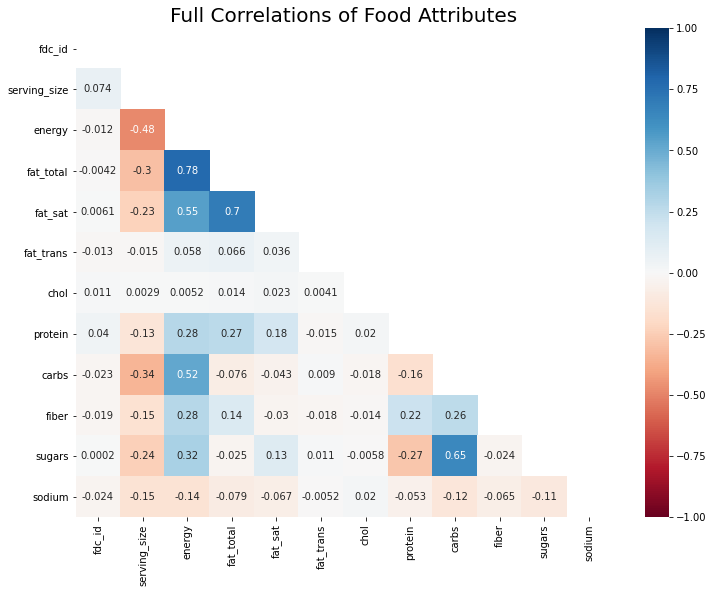

In [ ]:
corr = foods.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 9))
sns.heatmap(corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, mask=mask)
plt.title("Full Correlations of Food Attributes", size=20);

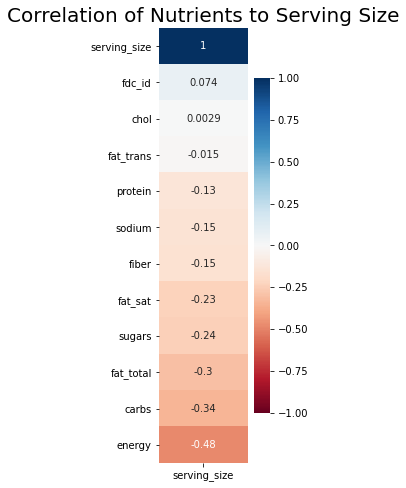

In [ ]:
plt.figure(figsize=(2, 8))
sns.heatmap(foods.corr()[["serving_size"]].sort_values(by="serving_size", ascending=False),
            vmax=1,vmin=-1,cmap="RdBu",annot=True)
plt.title("Correlation of Nutrients to Serving Size", size=20);

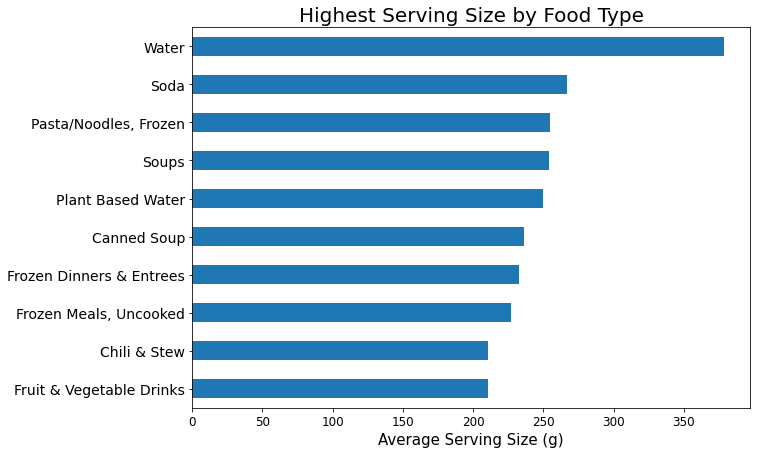

In [ ]:
y_ticks = ["Water", "Soda", "Pasta/Noodles, Frozen", "Soups", "Plant Based Water", "Canned Soup",
          "Frozen Dinners & Entrees", "Frozen Meals, Uncooked", "Chili & Stew", "Fruit & Vegetable Drinks"]
y_ticks = [ '\n'.join(wrap(tick, 30)) for tick in y_ticks]

plt.figure(figsize=(10, 7))

foods.groupby("branded_food_category")["serving_size"].mean().sort_values().tail(10).plot(kind="barh")
plt.title("Highest Serving Size by Food Type", size=20)
plt.xlabel("Average Serving Size (g)", size=15)
plt.xticks(size=12)
plt.ylabel(None)
plt.yticks(range(10), y_ticks[::-1], size=14);

Text(0.5, 0, 'Average Serving Size (g)')

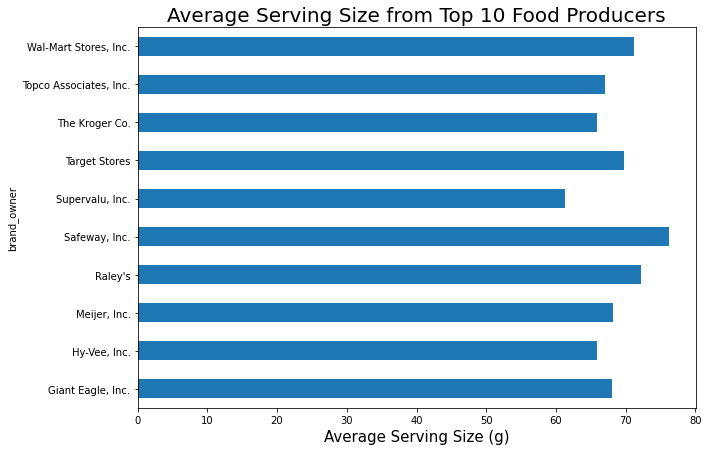

In [ ]:
top_brands = foods["brand_owner"].value_counts(ascending=False).head(10).index

top_companies = foods[foods["brand_owner"].isin(top_brands)]

plt.figure(figsize=(10, 7))
foods[foods["brand_owner"].isin(top_brands)].groupby("brand_owner")["serving_size"].mean().plot(kind="barh")
plt.title("Average Serving Size from Top 10 Food Producers", size=20)
plt.xlabel("Average Serving Size (g)", size=15)

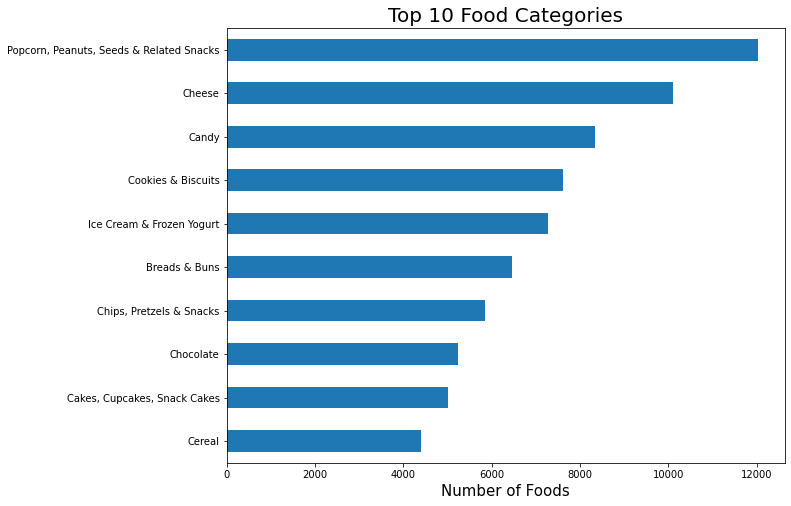

In [ ]:
top_10(foods,
       col="branded_food_category",
       title="Top 10 Food Categories",
       x_lab="Number of Foods")

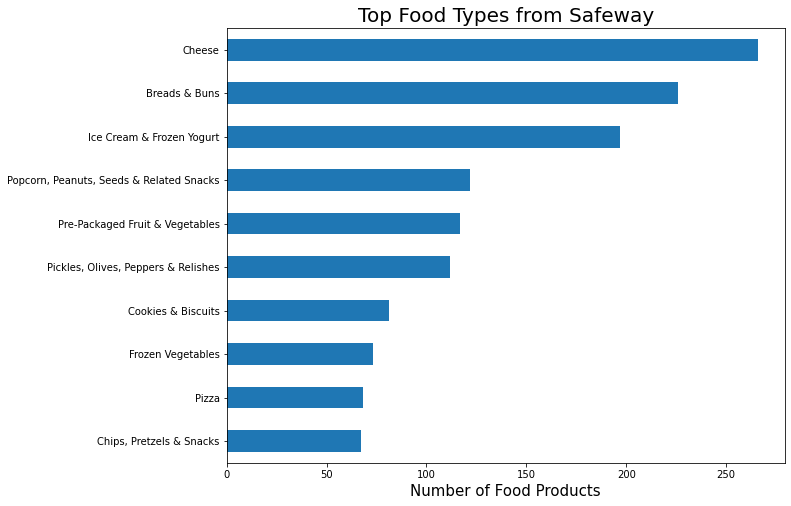

In [ ]:
top_10(foods[foods["brand_owner"] == "Safeway, Inc."] ,
      "branded_food_category",
      title="Top Food Types from Safeway",
      x_lab="Number of Food Products")

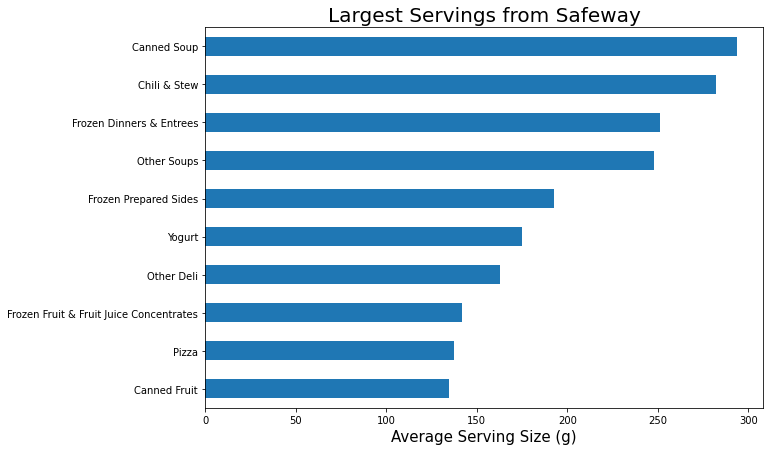

In [ ]:
safeway_top_servings = foods[foods["brand_owner"] == "Safeway, Inc."].groupby(
    "branded_food_category")["serving_size"].mean().sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 7))
safeway_top_servings.plot(kind="barh")
plt.title("Largest Servings from Safeway", size=20)
plt.xlabel("Average Serving Size (g)", size=15)
plt.ylabel(None);

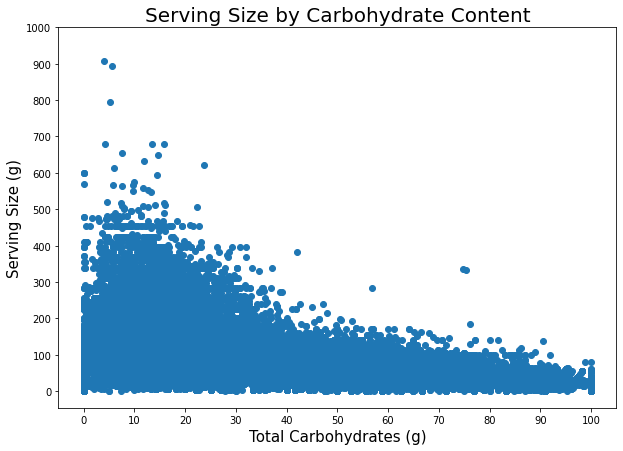

In [ ]:
scatter_plot(df=foods,
             x_col="carbs",
             y_col="serving_size",
             title="Serving Size by Carbohydrate Content",
             x_lab="Total Carbohydrates (g)",
             y_lab="Serving Size (g)",
             x_tick=range(0, 101, 10),
             y_tick=range(0, 1001, 100))

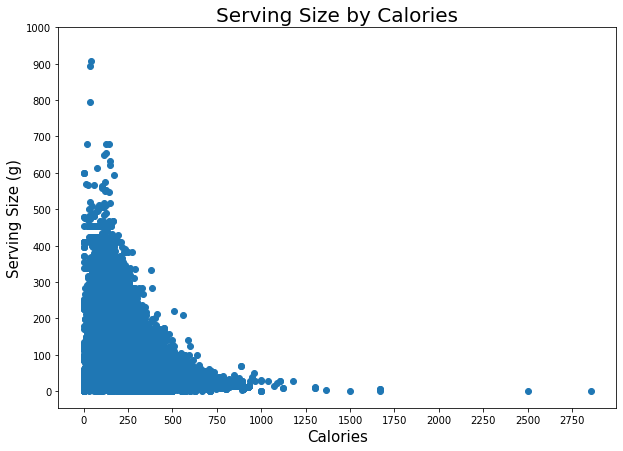

In [ ]:
scatter_plot(df=foods,
             y_col="serving_size",
             x_col="energy",
             title="Serving Size by Calories",
             y_lab="Serving Size (g)",
             x_lab="Calories",
             x_tick=range(0, 2800, 250),
            y_tick=range(0, 1001, 100))

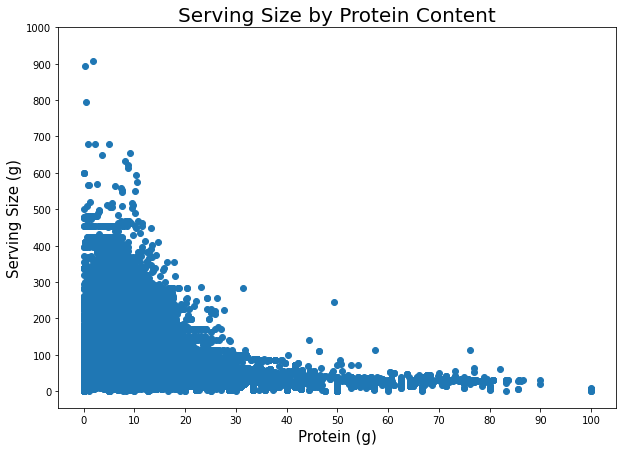

In [ ]:
scatter_plot(df=foods,
             x_col="protein",
             y_col="serving_size",
             title="Serving Size by Protein Content",
             x_lab="Protein (g)",
             y_lab="Serving Size (g)",
             x_tick=range(0, 101, 10),
             y_tick=range(0, 1001, 100))

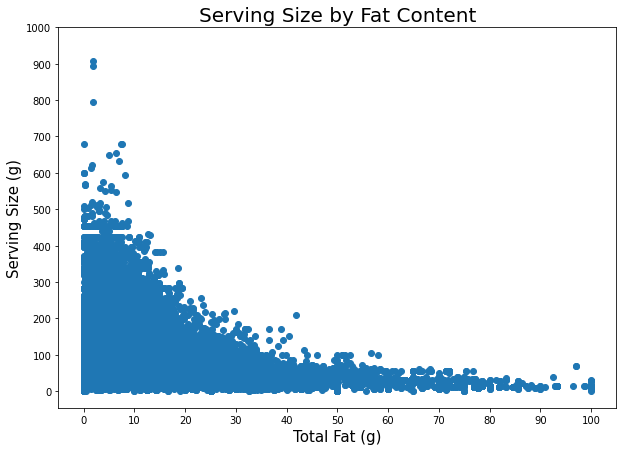

In [ ]:
scatter_plot(df=foods,
             x_col="fat_total",
             y_col="serving_size",
             title="Serving Size by Fat Content",
             x_lab="Total Fat (g)",
             y_lab="Serving Size (g)",
             x_tick=range(0, 101, 10),
             y_tick=range(0, 1001, 100))

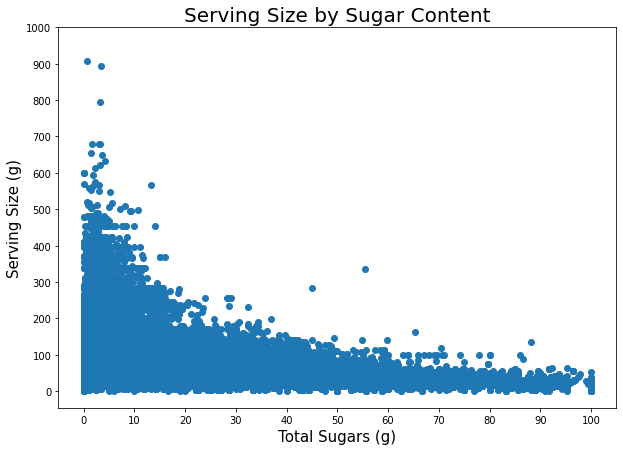

In [ ]:
scatter_plot(df=foods,
             x_col="sugars",
             y_col="serving_size",
             title="Serving Size by Sugar Content",
             x_lab="Total Sugars (g)",
             y_lab="Serving Size (g)",
             x_tick=range(0, 101, 10),
             y_tick=range(0, 1001, 100))

In [ ]:
def remove_parens(ings):
    return re.sub(" ?\([^)]+\)", "", ings)

In [ ]:
foods["ingredients"] = foods["ingredients"].apply(lambda x: remove_parens(x))

In [ ]:
def remove_punc(ings):
    return re.sub(pattern="[^ ,a-zA-Z0-9\[\]]",
       repl= "",
       string=ings)

In [ ]:
foods["ingredients"] = foods["ingredients"].apply(lambda x: remove_punc(x))

In [ ]:
def cust_tokens(string):
    return string.split(sep=", ")  

In [ ]:
cvec = CountVectorizer(tokenizer=cust_tokens, min_df=0.01, stop_words="english")

ing_vec = cvec.fit_transform(foods["ingredients"])

ing_vec_df = pd.DataFrame(ing_vec.toarray(), columns=cvec.get_feature_names(), index=foods.index)

In [ ]:
ing_vec_df.head()

,almonds,annatto,artificial color,artificial flavor,ascorbic acid,baking powder,baking soda,basil,beef,beta carotene,black pepper,blue 1,brown sugar,butter,buttermilk,calcium carbonate,calcium chloride,calcium propionate,calcium sulfate,cane sugar,canola oil,caramel color,carnauba wax,carob bean gum,carrageenan,carrots,cashews,celery,cellulose gum,cheddar cheese,cheese culture,chocolate,chocolate liquor,cilantro,cinnamon,citric acid,cocoa,cocoa butter,cocoa powder,cocoa processed with alkali,coconut oil,confectioners glaze,contains 2 or less of salt,corn,corn flour,corn starch,corn syrup,corn syrup solids,cornstarch,cream,...,salt,sea salt,seasoning,skim milk,sodium benzoate,sodium bicarbonate,sodium caseinate,sodium citrate,sodium diacetate,sodium erythorbate,sodium nitrite,sodium phosphate,sodium stearoyl lactylate,sorbic acid,sorbitol,soy flour,soy lecithin,soybean oil,spice,spices,sucralose,sugar,sunflower oil,tapioca starch,thiamin mononitrate,thiamine mononitrate,titanium dioxide,tomato paste,tomato puree,tomatoes,turmeric,vanilla,vanilla extract,vegetable oil,vegetable shortening,vinegar,vitamin a palmitate,water,wheat flour,wheat gluten,wheat starch,whey,whey powder,whey protein concentrate,whole wheat flour,xanthan gum,yeast,yeast extract,yellow 5,yellow 6
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


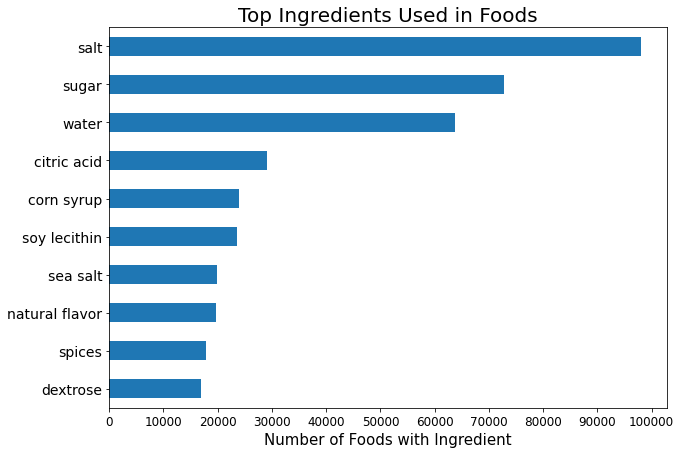

In [ ]:
plt.figure(figsize=(10, 7))

ing_vec_df.sum().sort_values(ascending=True).tail(10).plot(kind="barh")

plt.title("Top Ingredients Used in Foods", size=20)
plt.xlabel("Number of Foods with Ingredient", size=15)
plt.xticks(range(0, 100_001, 10_000), size=12)
plt.yticks(size=14);

In [ ]:
foods["log_serv"] = np.log(foods["serving_size"])

In [ ]:
foods = pd.get_dummies(data=foods,
                       columns=["branded_food_category"],
                       prefix="cat",
                       drop_first=True)

In [ ]:
foods.head()

,fdc_id,brand_owner,description,ingredients,serving_size,household_serving_fulltext,energy,fat_total,fat_sat,fat_trans,chol,protein,carbs,fiber,sugars,sodium,log_serv,cat_All Noodles,"cat_Bacon, Sausages & Ribs",cat_Baking,cat_Baking Accessories,cat_Baking Additives & Extracts,cat_Baking Decorations & Dessert Toppings,cat_Baking/Cooking Mixes (Perishable),cat_Baking/Cooking Mixes (Shelf Stable),cat_Baking/Cooking Mixes/Supplies Variety Packs,cat_Baking/Cooking Supplies (Shelf Stable),cat_Beef - Prepared/Processed,cat_Biscuits/Cookies (Shelf Stable),cat_Bread & Muffin Mixes,cat_Breads & Buns,cat_Breakfast Drinks,cat_Breakfast Foods,"cat_Breakfast Sandwiches, Biscuits & Meals",cat_Butter & Spread,"cat_Cake, Cookie & Cupcake Mixes",cat_Cakes - Sweet (Frozen),cat_Cakes - Sweet (Shelf Stable),"cat_Cakes, Cupcakes, Snack Cakes",cat_Candy,cat_Canned & Bottled Beans,cat_Canned Condensed Soup,cat_Canned Fruit,cat_Canned Meat,cat_Canned Seafood,cat_Canned Soup,cat_Canned Tuna,cat_Canned Vegetables,cat_Cereal,cat_Cereal/Muesli Bars,...,"cat_Pancakes, Waffles, French Toast & Crepes",cat_Pasta Dinners,cat_Pasta by Shape & Type,cat_Pasta/Noodles - Not Ready to Eat (Frozen),cat_Pastry Shells & Fillings,"cat_Pepperoni, Salami & Cold Cuts","cat_Pickles, Olives, Peppers & Relishes",cat_Pies/Pastries - Sweet (Shelf Stable),cat_Pies/Pastries/Pizzas/Quiches - Savoury (Frozen),cat_Pizza,cat_Pizza Mixes & Other Dry Dinners,cat_Plant Based Milk,cat_Plant Based Water,cat_Popcorn (Shelf Stable),"cat_Popcorn, Peanuts, Seeds & Related Snacks",cat_Pork Sausages - Prepared/Processed,"cat_Poultry, Chicken & Turkey",cat_Powdered Drinks,cat_Pre-Packaged Fruit & Vegetables,cat_Prepared Pasta & Pizza Sauces,cat_Prepared Subs & Sandwiches,cat_Prepared Wraps and Burittos,cat_Processed Cheese & Cheese Novelties,cat_Puddings & Custards,cat_Rice,cat_Salad Dressing & Mayonnaise,"cat_Sausages, Hotdogs & Brats","cat_Seasoning Mixes, Salts, Marinades & Tenderizers","cat_Snack, Energy & Granola Bars",cat_Soda,cat_Soups - Prepared (Shelf Stable),cat_Specialty Formula Supplements,cat_Sport Drinks,cat_Stuffing,cat_Sushi,cat_Syrups & Molasses,cat_Tea Bags,cat_Tomatoes,cat_Vegetable & Cooking Oils,cat_Vegetable Based Products / Meals - Not Ready to Eat (Frozen),cat_Vegetable and Lentil Mixes,cat_Vegetables - Prepared/Processed (Frozen),cat_Vegetables - Prepared/Processed (Shelf Stable),cat_Vegetarian Frozen Meats,cat_Vitamins,cat_Water,cat_Weight Control,cat_Wholesome Snacks,cat_Yogurt,cat_Yogurt/Yogurt Substitutes (Perishable)
0,356425,"G. T. Japan, Inc.",MOCHI ICE CREAM BONBONS,"ICE CREAM INGREDIENTS MILK, CREAM, SUGAR, STRAWBERRIES, CORN SYRUP SOLIDS, SKIM MILK, WHEY, NATU...",40.0,1 PIECE,200.0,6.25,3.75,0.0,25.0,2.5,35.00,0.0,30.00,75.0,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,356426,FRESH & EASY,CHIPOTLE BARBECUE SAUCE,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2 OR LESS OF CORN STARCH, SALT...",37.0,2 Tbsp,162.0,0.00,0.00,0.0,0.0,0.0,43.24,0.0,37.84,703.0,3.610918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,356427,FRESH & EASY,HOT & SPICY BARBECUE SAUCE,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,2 Tbsp,176.0,0.00,0.00,0.0,0.0,0.0,41.18,0.0,35.29,676.0,3.526361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,356428,FRESH & EASY,BARBECUE SAUCE,"TOMATO PUREE, SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STARCH, SALT, BOURBON WHI...",35.0,2 Tbsp,143.0,0.00,0.00,0.0,0.0,0.0,34.29,0.0,28.57,971.0,3.555348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,

In [ ]:
X = foods.drop(columns=["fdc_id", 
                        "brand_owner", 
                        "description", 
                        "ingredients", 
                        "household_serving_fulltext",
                        "serving_size",
                       "log_serv"])
y = foods["log_serv"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [ ]:
base_mean = DummyRegressor(strategy='mean')

base_mean_model = base_mean.fit(X_train, y_train)

y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)

print("Our Train MSE Score for our Base Model is:", metrics.mean_squared_error(np.exp(y_train),np.exp(y_hat_base_train)))
print("Our Test MSE Score for our Base Model is:",  metrics.mean_squared_error(np.exp(y_test),np.exp(y_hat_base_test)))

Our Train MSE Score for our Base Model is: 3701.098446853142
Our Test MSE Score for our Base Model is: 3770.766001926478


In [ ]:
def grid_searcher(pipe, params):
    gs = GridSearchCV(estimator=pipe, param_grid=params, cv=3, verbose=1, n_jobs=3)
    gs.fit(X_train_sc, y_train)
    print(f'CrossVal Score: {gs.best_score_}')
    print(f'Training Score: {gs.score(X_train_sc, y_train)}')
    print(f'Testing Score: {gs.score(X_test_sc, y_test)}')
    print(gs.best_params_)
    return gs

In [ ]:
def permutate_params(grid_params):
    out = [{}]
    for param_name, param_list in grid_params.items():
        if len(param_list) == 1:
            for item in out:
                item[param_name] = param_list[0]
        else:
            temp_out = []
            for param_val in param_list:
                for item in out:
                    cloned_item = item.copy()
                    cloned_item[param_name] = param_val
                    temp_out.append(cloned_item)
            out = temp_out
    return out

In [ ]:
def build_model(params_dict, X_train, X_test, y_train, y_test):
    first_layer_nodes = params_dict.get("first_layer_nodes") or 16            
    first_dropout_rate = params_dict.get("first_dropout_rate") or 0.0         
    
    second_layer_nodes = params_dict.get("second_layer_nodes") or 16          
    second_dropout_rate = params_dict.get("second_dropout_rate") or 0.0       
    
    third_layer_nodes = params_dict.get("third_layer_nodes") or 16            
    third_dropout_rate = params_dict.get("third_dropout_rate") or 0.0         
    
    reg = params_dict.get("reg") or 0                                         
    
    epochs = params_dict.get("epochs") or 10                                  
    batch_size = params_dict.get("batch_size") or 1024                        
    early_stop = params_dict.get("early_stop") or EarlyStopping(monitor="val_loss",
                                                                min_delta=0.000000001,  
                                                                patience=100)           
    
    model = Sequential()

    model.add(Dense(first_layer_nodes,
                   activation="relu",
                   input_shape=(X_train.shape[1],),
                   kernel_regularizer=regularizers.l2(reg)))
    model.add(Dropout(first_dropout_rate))
    
    model.add(Dense(second_layer_nodes,
                    activation="relu",
                    kernel_regularizer=regularizers.l2(reg)))
    model.add(Dropout(second_dropout_rate))
    
    model.add(Dense(third_layer_nodes,
                    activation="relu",
                    kernel_regularizer=regularizers.l2(reg)))
    model.add(Dropout(third_dropout_rate))
    
    model.add(Dense(1))
    
    model.compile(loss="mean_squared_error",
             optimizer="adam")
    
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                       callbacks=[early_stop])
    return model, history

In [ ]:
def nn_grid_search(
    X,
    y,
    grid_params,
    random_state=42
):  


    all_params = permutate_params(grid_params)
    
    best_model = None
    best_score = 0.0 
    best_params = None
    best_history = None
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    for i, params in enumerate(all_params):
        
        print(f"Building model {i + 1} of {len(all_params)}")
        
        model, history = build_model(
            params_dict = params,
            X_train = X_train_sc, 
            X_test = X_test_sc, 
            y_train = y_train, 
            y_test = y_test
        )
        
        test_preds = model.predict(X_test_sc)
        score = metrics.r2_score(y_test, test_preds)
        
        if score > best_score:
            print("***Good R2 found: {:.2%}***".format(score))
            best_score = score
            best_model = model
            best_params = params
            best_history = history
    
    return {
        "best_model"   : best_model,
        "best_score"   : best_score,
        "best_params"  : best_params,
        "best_history" : best_history,
        "test_preds"   : test_preds
    }

In [ ]:
 node_params = {
     "first_layer_nodes": [256, 128, 64],
     "second_layer_nodes": [128, 64, 32],
     "third_layer_nodes": [64, 32, 16],
 }

In [ ]:
best_model_dict = nn_grid_search(X, y, node_params)

Building model 1 of 27
Epoch 1/10
139/139 [==============================] - 15s 8ms/step - loss: 3.8747 - val_loss: 0.2172
Epoch 2/10
139/139 [==============================] - 1s 4ms/step - loss: 0.2178 - val_loss: 0.1771
Epoch 3/10
139/139 [==============================] - 0s 3ms/step - loss: 0.1799 - val_loss: 0.1625
Epoch 4/10
139/139 [==============================] - 1s 4ms/step - loss: 0.1607 - val_loss: 0.1561
Epoch 5/10
139/139 [==============================] - 0s 3ms/step - loss: 0.1544 - val_loss: 0.1520
Epoch 6/10
139/139 [==============================] - 0s 3ms/step - loss: 0.1506 - val_loss: 0.1469
Epoch 7/10
139/139 [==============================] - 1s 4ms/step - loss: 0.1419 - val_loss: 0.1476
Epoch 8/10
139/139 [==============================] - 0s 3ms/step - loss: 0.1400 - val_loss: 0.1426
Epoch 9/10
139/139 [==============================] - 1s 4ms/step - loss: 0.1361 - val_loss: 0.1363
Epoch 10/10
139/139 [==============================] - 1s 4ms/step - loss: 0

In [ ]:
best_model_dict

{'best_history': <keras.callbacks.History at 0x7f5d789d9550>,
 'best_model': <keras.engine.sequential.Sequential at 0x7f5d78dc8350>,
 'best_params': {'first_layer_nodes': 256,
  'second_layer_nodes': 128,
  'third_layer_nodes': 16},
 'best_score': 0.8696815258868924,
 'test_preds': array([[4.601772 ],
        [4.488932 ],
        [3.3245015],
        ...,
        [3.1911561],
        [3.1829083],
        [3.4749832]], dtype=float32)}

In [ ]:
nn_train_preds = best_model_dict["best_model"].predict(X_train_sc)
nn_test_preds = best_model_dict["best_model"].predict(X_test_sc)

print(f"The train R2 score is: {metrics.r2_score(y_train, nn_train_preds)}.")
print(f"The test R2 score is: {metrics.r2_score(y_test, nn_test_preds)}.")

The train R2 score is: 0.8755448738474103.
The test R2 score is: 0.8696815258868924.


In [ ]:
best_model_dict["best_params"]

{'first_layer_nodes': 256, 'second_layer_nodes': 128, 'third_layer_nodes': 16}

In [ ]:
 pdict = {
     "first_layer_nodes": [256],
     "first_dropout_rate": [0, 0.5],
     "second_layer_nodes": [64],
     "second_dropout_rate": [0, 0.5],
     "third_layer_nodes": [32],
     "third_dropout_rate": [0, 0.5],
     "reg": [0.001, 0.01],
     "epochs": [75],
     "early_stop": [EarlyStopping(monitor="val_loss",
                                 min_delta=0.0001,
                                 patience=7)]         
 }

In [ ]:
final_nn_model_dict = nn_grid_search(X, y, grid_params=pdict)

Building model 1 of 16
Epoch 1/75
139/139 [==============================] - 1s 5ms/step - loss: 4.3146 - val_loss: 0.5412
Epoch 2/75
139/139 [==============================] - 0s 3ms/step - loss: 0.5074 - val_loss: 0.4516
Epoch 3/75
139/139 [==============================] - 1s 4ms/step - loss: 0.4379 - val_loss: 0.4251
Epoch 4/75
139/139 [==============================] - 1s 4ms/step - loss: 0.4096 - val_loss: 0.3830
Epoch 5/75
139/139 [==============================] - 0s 3ms/step - loss: 0.3688 - val_loss: 0.3481
Epoch 6/75
139/139 [==============================] - 0s 3ms/step - loss: 0.3393 - val_loss: 0.3264
Epoch 7/75
139/139 [==============================] - 1s 4ms/step - loss: 0.3209 - val_loss: 0.3069
Epoch 8/75
139/139 [==============================] - 1s 4ms/step - loss: 0.3004 - val_loss: 0.2921
Epoch 9/75
139/139 [==============================] - 1s 4ms/step - loss: 0.2870 - val_loss: 0.2770
Epoch 10/75
139/139 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
###   DO NOT RE-RUN    ###
###   W/O ABOVE CELL   ###

# # making new file
outfile = open("final_nn_pickle", "wb")

# # dumping model to pickle
pickle.dump(final_nn_model_dict, outfile)

# # closing new file
outfile.close()

AttributeError: ignored

In [ ]:
final_nn_model_dict

{'best_history': <keras.callbacks.History at 0x7f5d78f07450>,
 'best_model': <keras.engine.sequential.Sequential at 0x7f5d791248d0>,
 'best_params': {'early_stop': <keras.callbacks.EarlyStopping at 0x7f5d78de6350>,
  'epochs': 75,
  'first_dropout_rate': 0,
  'first_layer_nodes': 256,
  'reg': 0.001,
  'second_dropout_rate': 0,
  'second_layer_nodes': 64,
  'third_dropout_rate': 0,
  'third_layer_nodes': 32},
 'best_score': 0.8920010978361368,
 'test_preds': array([[4.485135 ],
        [4.399228 ],
        [3.3774273],
        ...,
        [3.3282561],
        [3.4212828],
        [3.500318 ]], dtype=float32)}

In [ ]:
final_nn_model = final_nn_model_dict["best_model"]

nn_train_preds = final_nn_model.predict(X_train_sc)
nn_test_preds = final_nn_model.predict(X_test_sc)

print(f"The train R2 score is: {metrics.r2_score(y_train, nn_train_preds)}.")
print(f"The test R2 score is: {metrics.r2_score(y_test, nn_test_preds)}.")

The train R2 score is: 0.8983888742228755.
The test R2 score is: 0.8920010978361368.


In [ ]:
###   DO NOT RE-RUN    ###
###   W/O ABOVE CELL   ###

# # making new file
outfile = open("final_nn_pickle", "wb")

# # dumping model to pickle
pickle.dump(final_nn_model, outfile)

# # closing new file
outfile.close()

AttributeError: ignored

In [ ]:
train_pred_df = pd.DataFrame(columns=["y_train",
                                      "neural_net"])
test_pred_df = pd.DataFrame(columns=["y_test",
                                     "neural_net"])
train_pred_df["y_train"] = np.exp(y_train)
test_pred_df["y_test"] = np.exp(y_test)

In [ ]:
sc_models = {"neural_net": final_nn_model}


for model in sc_models.keys():
    train_pred_df[model] = np.exp(sc_models[model].predict(X_train_sc))
    test_pred_df[model] = np.exp(sc_models[model].predict(X_test_sc))

In [ ]:
train_pred_df.head()

,y_train,neural_net
251496,85.0,65.619110
254072,30.0,28.912888
209063,128.0,139.561813
143457,60.0,46.194607
139676,40.0,40.556252


In [ ]:
test_pred_df.head()

,y_test,neural_net
209258,70.0,77.798988
247837,91.0,96.444000
210336,28.0,28.383198
53443,21.0,25.139427
113215,241.0,151.271240


In [ ]:
mse_df = pd.DataFrame(index=train_pred_df.columns[1:], columns=["train_mse", "test_mse"])

for model in train_pred_df.columns[1:]:
    
    mse_df.loc[model] = [
        metrics.mean_squared_error(train_pred_df["y_train"], train_pred_df[model]),
        metrics.mean_squared_error(test_pred_df["y_test"], test_pred_df[model])
    ]

mse_df["var"] = abs(mse_df["train_mse"] - mse_df["test_mse"])

In [ ]:
mse_df

,train_mse,test_mse,var
neural_net,565.201,596.063,30.8622


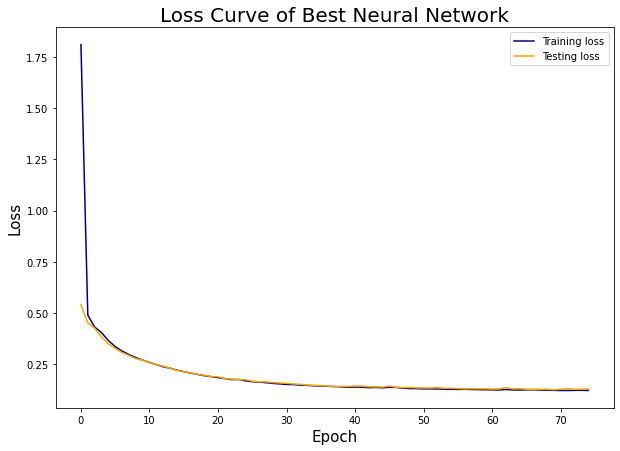

In [ ]:
train_loss = final_nn_model_dict["best_history"].history["loss"]
test_loss = final_nn_model_dict["best_history"].history["val_loss"]


plt.figure(figsize=(10, 7))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='orange')
plt.title("Loss Curve of Best Neural Network", size=20)
plt.xlabel("Epoch", size=15)
plt.ylabel("Loss", size=15)
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


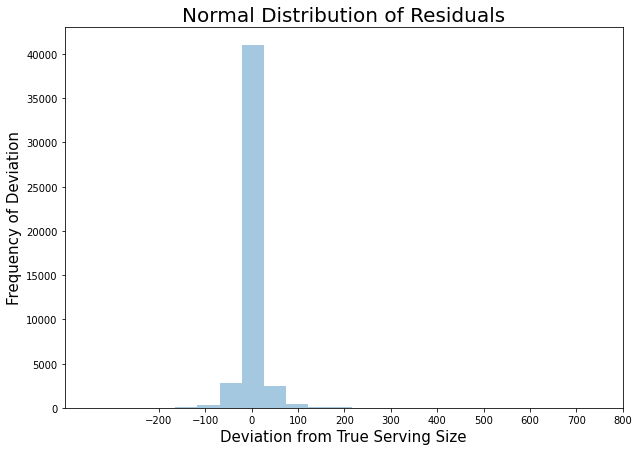

In [ ]:
resids = test_pred_df["y_test"] - test_pred_df["neural_net"]

plt.figure(figsize=(10, 7))
sns.distplot(resids, bins=20, kde=False)
plt.title("Normal Distribution of Residuals", size=20)
plt.xlabel("Deviation from True Serving Size", size=15)
plt.ylabel("Frequency of Deviation", size=15)
plt.xticks(range(-200, 801, 100));